In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn import datasets
housedata = datasets.load_boston()

warnings.filterwarnings('ignore')

df_data = pd.DataFrame(housedata.data, columns=housedata.feature_names)
df_target = pd.DataFrame(housedata.target, columns=['Target'])
df = pd.concat([df_data, df_target], axis=1)

EDA

In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
print(df.info())
print(df.keys())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Target'],
      dtype='object')


In [5]:
df_corr = df.corr()

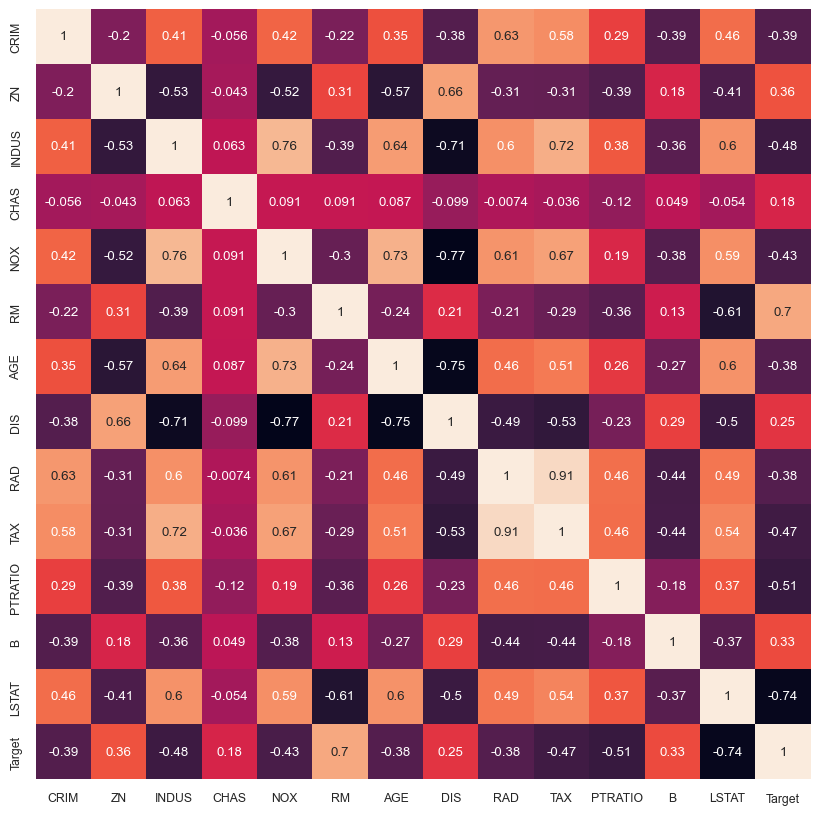

In [6]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [7]:
corr_order = df.corr().loc[:'LSTAT', 'Target'].abs().sort_values(ascending=False)
corr_order

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

In [8]:
plot_cols = ['Target', 'LSTAT', 'RM', 'PTRATIO', 'INDUS']
plot_df = df.loc[:, plot_cols]
plot_df.head()

,Target,LSTAT,RM,PTRATIO,INDUS
0,24.0,4.98,6.575,15.3,2.31
1,21.6,9.14,6.421,17.8,7.07
2,34.7,4.03,7.185,17.8,7.07
3,33.4,2.94,6.998,18.7,2.18
4,36.2,5.33,7.147,18.7,2.18


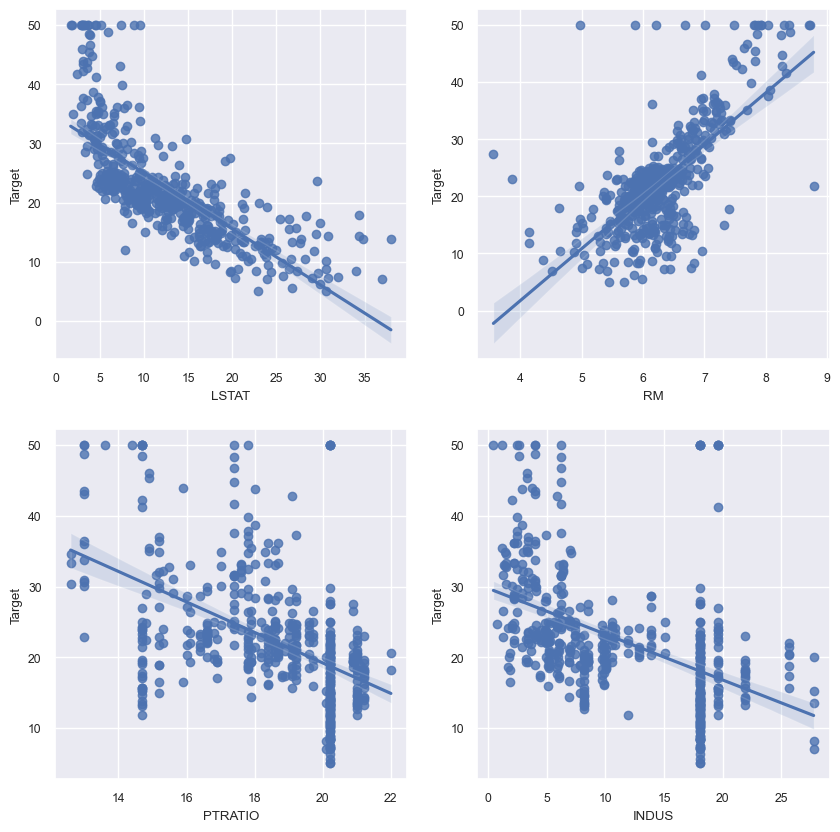

In [9]:
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]):
  ax1 = plt.subplot(2, 2, idx+1)
  sns.regplot(x=col, y=plot_cols[0], data=plot_df, ax=ax1)
plt.show()

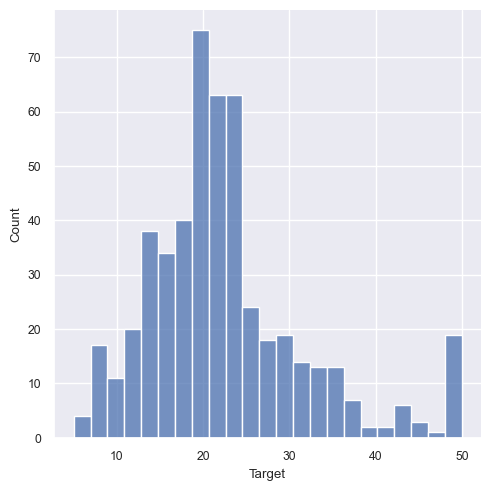

In [10]:
sns.displot(x='Target', kind='hist', data=df)
plt.show()

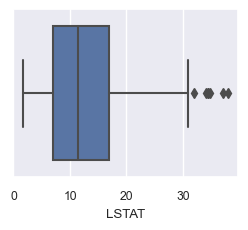

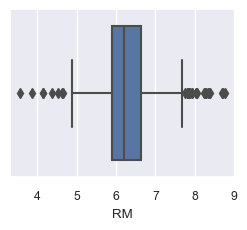

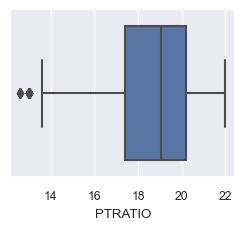

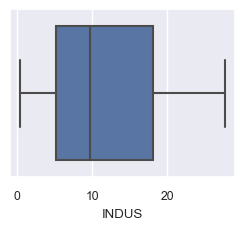

In [11]:
# z-score 방식으로 이상치 검사

for x in plot_cols[1:]:
    # 이상치 시각화
    ax1=plt.subplot(2, 2, idx+1)
    sns.boxplot(x=x, data=plot_df)
    plt.show()

In [76]:
X = df[['LSTAT', 'RM', 'PTRATIO', 'INDUS']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 4), (102, 4), (404,), (102,))

In [77]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [78]:
# 테스트 데이터에 대한 예측값 구하기
y_pred = lr.predict(X_test)

# 실제값과 예측값 간의 MSE 값 구하기
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 27.24931761650079


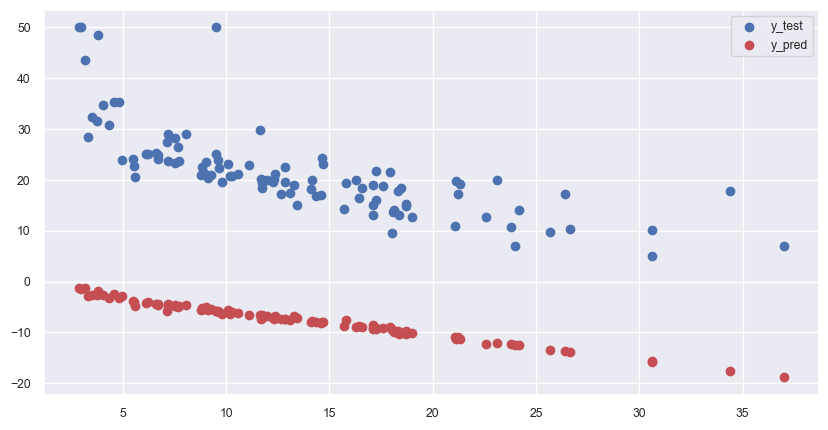

In [80]:
#예측값 저장
y_test_pred=lr2.predict(X_test)

#예측값과 실제값의 분포
plt.figure(figsize=(10, 5)) #표 크기 지정
plt.scatter(X_test['LSTAT'], y_test, label='y_test')  #파란점, 실제값
plt.scatter(X_test['LSTAT'], y_test_pred, c='r', label='y_pred')  #빨간점, 예측값
plt.legend(loc='best')  #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

스탠다드 스케일링

In [81]:
scaler = StandardScaler()
df_s = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_s, columns=df.columns)

print('befor scaling')
print(df.mean().head())
print(df.std().head())
print('\n after scaling')
print(df_scaled.mean().head())
print(df_scaled.std().head())

befor scaling
CRIM      3.613524
ZN       11.363636
INDUS    11.136779
CHAS      0.069170
NOX       0.554695
dtype: float64
CRIM      8.601545
ZN       23.322453
INDUS     6.860353
CHAS      0.253994
NOX       0.115878
dtype: float64

 after scaling
CRIM    -8.513173e-17
ZN       3.306534e-16
INDUS    2.804081e-16
CHAS    -3.100287e-16
NOX     -8.071058e-16
dtype: float64
CRIM     1.00099
ZN       1.00099
INDUS    1.00099
CHAS     1.00099
NOX      1.00099
dtype: float64


In [82]:
print(int(3.306534e-16))

# 평균과 표준편차가 각각 0과 1에 가까워짐

0


선형회귀 학습

In [83]:
X = df_scaled[['LSTAT', 'RM', 'PTRATIO', 'INDUS']]
y = df_scaled['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 4), (102, 4), (404,), (102,))

In [84]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

In [85]:
# 테스트 데이터에 대한 예측값 구하기
y_pred = lr2.predict(X_test)

# 실제값과 예측값 간의 MSE 값 구하기
after_mse = mean_squared_error(y_test, y_pred)
print("MSE:", after_mse)

MSE: 0.3227844217291665


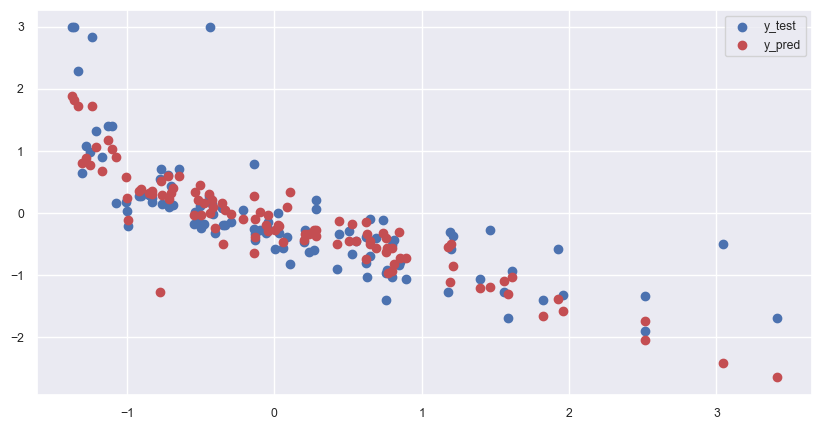

In [86]:
#예측값 저장
y_test_pred=lr2.predict(X_test)

#예측값과 실제값의 분포
plt.figure(figsize=(10, 5)) #표 크기 지정
plt.scatter(X_test['LSTAT'], y_test, label='y_test')  #파란점, 실제값
plt.scatter(X_test['LSTAT'], y_test_pred, c='r', label='y_pred')  #빨간점, 예측값
plt.legend(loc='best')  #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

비교

In [75]:
print("before mse: ", mse, "\nafter mse: ", after_mse)

before mse:  24.291119474973584 
after mse:  0.3227844217291665
